# LeNet

Implementation of LeNet by LeCun et al. [1] in Keras. LeNet has the following structure:

<img src="images/lenet.png" width="80%"/>

<img src="images/lenet_test.gif"/>

A testing of the network by Yann LeCun in 1993 can be watched in [YouTube](https://www.youtube.com/watch?v=FwFduRA_L6Q)

The data used in this example can be found in [Kaggle]( https://www.kaggle.com/c/digit-recognizer/data) site.

[1] Y. Lecun, L. Bottou, Y. Bengio and P. Haffner, "Gradient-based learning applied to document recognition," in Proceedings of the IEEE, vol. 86, no. 11, pp. 2278-2324, Nov. 1998.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils.np_utils import to_categorical

/opt/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


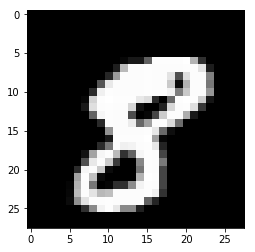

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Y_train = train[['label']]
X_train = train.drop(train.columns[[0]], axis=1)
X_test = test

#Visualizing the data
sample = X_train.iloc[10, :]
sample = sample.values.reshape([28,28])
plt.imshow(sample, cmap='gray')

X_train = np.array(X_train)
X_test = np.array(X_test)

#Reshape the training and test set
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#Padding the images by 2 pixels since in the paper input images were 32x32
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

#Standardization
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
X_train = (X_train - mean_px)/(std_px)

#One-hot encoding the labels
Y_train = to_categorical(Y_train)

In [3]:
model = Sequential()
#Conv Layer 1
model.add(Conv2D(filters=6, 
                 kernel_size=5, 
                 strides=1, 
                 activation='relu', 
                 input_shape=(32,32,1)))
#Pooling layer 1
model.add(MaxPooling2D(pool_size=2, 
                       strides=2))
#Conv Layer 2
model.add(Conv2D(filters=16, 
                 kernel_size=5, 
                 strides=1, 
                 activation='relu', 
                 input_shape=(14,14,6)))
#Pooling Layer 2
model.add(MaxPooling2D(pool_size=2, 
                       strides=2))
#Flatten
model.add(Flatten())
#Fully connected layer 1
model.add(Dense(units=120, 
                activation='relu'))
#Fully connected layer 2
model.add(Dense(units=84, 
                activation='relu'))
#Output Layer
model.add(Dense(units=10, 
                activation='softmax'))
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [4]:
#Train model
model.fit(X_train ,Y_train, steps_per_epoch = 10, epochs = 42)

Epoch 1/42
10/10 [==============================] - 16s 2s/step - loss: 1.9122 - acc: 0.4581
Epoch 2/42
10/10 [==============================] - 4s 438ms/step - loss: 0.8769 - acc: 0.7849
Epoch 3/42
10/10 [==============================] - 4s 416ms/step - loss: 0.3902 - acc: 0.8835
Epoch 4/42
10/10 [==============================] - 4s 436ms/step - loss: 0.2737 - acc: 0.9177
Epoch 5/42
10/10 [==============================] - 4s 420ms/step - loss: 0.2127 - acc: 0.9362
Epoch 6/42
10/10 [==============================] - 4s 434ms/step - loss: 0.1702 - acc: 0.9499
Epoch 7/42
10/10 [==============================] - 4s 417ms/step - loss: 0.1398 - acc: 0.9592
Epoch 8/42
10/10 [==============================] - 4s 417ms/step - loss: 0.1172 - acc: 0.9653
Epoch 9/42
10/10 [==============================] - 4s 411ms/step - loss: 0.1002 - acc: 0.9706
Epoch 10/42
10/10 [==============================] - 4s 437ms/step - loss: 0.0871 - acc: 0.9741
Epoch 11/42
10/10 [==============================] 

In [5]:
# Test model
y_pred = model.predict(X_test)

In [6]:
#Converting one hot vectors to labels
labels = np.argmax(y_pred, axis=1)
index = np.arange(1, 28001)
labels = labels.reshape([len(labels), 1])
index = index.reshape([len(index), 1])
final = np.concatenate([index, labels], axis=1)

#Prediction csv file
np.savetxt("results_mnist.csv", final, delimiter = " ", fmt = '%s')